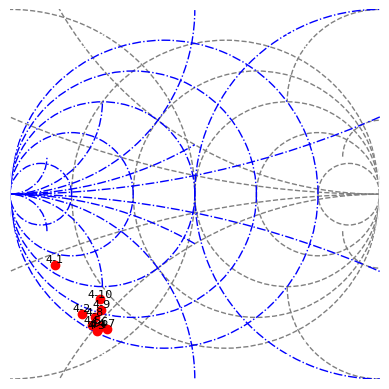

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc


def draw_smith_chart():
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axis('off')

    # 绘制阻抗等电阻圆
    r_values = [0, 0.2, 0.5, 1, 2, 5]
    for r in r_values:
        if r == 0:
            # 当 r = 0 时，圆心在 (-1, 0)，半径为 1
            center = (-1, 0)
            radius = 1
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=0, theta2=360, color='gray', linestyle='--')
        else:
            center = (r / (1 + r), 0)
            radius = 1 / (1 + r)
            if radius > 1:
                # 增加输入值的范围检查
                cos_theta = (1 - radius ** 2 + 1) / (2 * radius)
                cos_theta = np.clip(cos_theta, -1, 1)
                theta = np.arccos(cos_theta)
                theta_deg = np.rad2deg(theta)
                arc = Arc(center, 2 * radius, 2 * radius,
                          theta1=180 - theta_deg, theta2=180 + theta_deg, color='gray', linestyle='--')
            else:
                arc = Arc(center, 2 * radius, 2 * radius,
                          theta1=0, theta2=360, color='gray', linestyle='--')
        ax.add_patch(arc)

    # 绘制阻抗等电抗圆
    x_values = [0.2, 0.5, 1, 2, 5]
    for x in x_values:
        # 正电抗圆
        center = (1, 1 / x)
        radius = 1 / x
        if radius > 1:
            # 增加输入值的范围检查
            cos_theta = (1 - radius ** 2 + 1) / (2 * radius)
            cos_theta = np.clip(cos_theta, -1, 1)
            theta = np.arccos(cos_theta)
            theta_deg = np.rad2deg(theta)
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=180 - theta_deg, theta2=180 + theta_deg, color='gray', linestyle='--')
        else:
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=0, theta2=180, color='gray', linestyle='--')
        ax.add_patch(arc)
        # 负电抗圆
        center = (1, -1 / x)
        if radius > 1:
            # 增加输入值的范围检查
            cos_theta = (1 - radius ** 2 + 1) / (2 * radius)
            cos_theta = np.clip(cos_theta, -1, 1)
            theta = np.arccos(cos_theta)
            theta_deg = np.rad2deg(theta)
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=180 - theta_deg, theta2=180 + theta_deg, color='gray', linestyle='--')
        else:
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=180, theta2=360, color='gray', linestyle='--')
        ax.add_patch(arc)

    # 绘制导纳等电导圆
    g_values = [0, 0.2, 0.5, 1, 2, 5]
    for g in g_values:
        if g == 0:
            # 当 g = 0 时，圆心在 (1, 0)，半径为 1
            center = (1, 0)
            radius = 1
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=0, theta2=360, color='blue', linestyle='-.')
        else:
            center = (-g / (1 + g), 0)
            radius = 1 / (1 + g)
            if radius > 1:
                # 增加输入值的范围检查
                cos_theta = (1 - radius ** 2 + 1) / (2 * radius)
                cos_theta = np.clip(cos_theta, -1, 1)
                theta = np.arccos(cos_theta)
                theta_deg = np.rad2deg(theta)
                arc = Arc(center, 2 * radius, 2 * radius,
                          theta1=180 - theta_deg, theta2=180 + theta_deg, color='blue', linestyle='-.')
            else:
                arc = Arc(center, 2 * radius, 2 * radius,
                          theta1=0, theta2=360, color='blue', linestyle='-.')
        ax.add_patch(arc)

    # 绘制导纳等电纳圆
    b_values = [0.2, 0.5, 1, 2, 5]
    for b in b_values:
        # 正电纳圆
        center = (-1, 1 / b)
        radius = 1 / b
        if radius > 1:
            # 增加输入值的范围检查
            cos_theta = (1 - radius ** 2 + 1) / (2 * radius)
            cos_theta = np.clip(cos_theta, -1, 1)
            theta = np.arccos(cos_theta)
            theta_deg = np.rad2deg(theta)
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=180 - theta_deg, theta2=180 + theta_deg, color='blue', linestyle='-.')
        else:
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=180, theta2=360, color='blue', linestyle='-.')
        ax.add_patch(arc)
        # 负电纳圆
        center = (-1, -1 / b)
        if radius > 1:
            # 增加输入值的范围检查
            cos_theta = (1 - radius ** 2 + 1) / (2 * radius)
            cos_theta = np.clip(cos_theta, -1, 1)
            theta = np.arccos(cos_theta)
            theta_deg = np.rad2deg(theta)
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=180 - theta_deg, theta2=180 + theta_deg, color='blue', linestyle='-.')
        else:
            arc = Arc(center, 2 * radius, 2 * radius,
                      theta1=0, theta2=180, color='blue', linestyle='-.')
        ax.add_patch(arc)

    # 移除绘制单位圆轮廓的代码
    unit_circle_outline = plt.Circle((0, 0), 1, color='white', fill=False)
    ax.add_artist(unit_circle_outline)

    return ax


def impedance_to_gamma(z, z0=50):
    return (z - z0) / (z + z0)


def plot_complex_numbers_on_smith(complex_numbers, labels, ax):
    for z, label in zip(complex_numbers, labels):
        gamma = impedance_to_gamma(z)
        ax.plot(np.real(gamma), np.imag(gamma), 'ro')
        ax.text(np.real(gamma), np.imag(gamma), label, fontsize=8, ha='center', va='bottom')


if __name__ == "__main__":
    # 复数数据
    complex_numbers = [4.3 - 11.78j, 3.45 - 21.41j, 3.05 - 25.59j, 3.39 - 25.67j,
                       3.27 - 24.30j, 4 - 25.49j, 4.5 - 26.93j, 4.67 - 23.62j,
                       6.66 - 23.52j, 7.99 - 21.79j]
    # 环数标签
    labels = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6', '4-7', '4-8', '4-9', '4-10']
    ax = draw_smith_chart()
    plot_complex_numbers_on_smith(complex_numbers, labels, ax)
    plt.show()
    

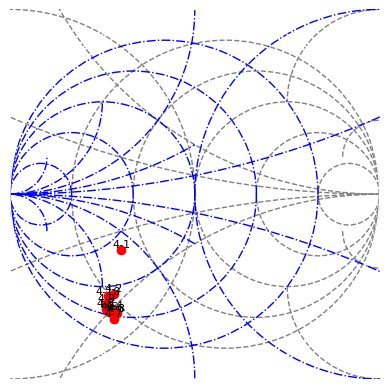

In [8]:
if __name__ == "__main__":
    # 复数数据
    complex_numbers = [18.35 - 14.73j, 10.99 - 22.82j, 8.33 - 26.37j, 8.5 - 25.78j,
                       7.51 - 24.99j, 8.12 - 26.19j, 7.03 - 26.73j, 7.45 - 24.08j,
                       8.32 - 23.34j, 9.67 - 22.39j]
    # 环数标签
    labels = ['4-1', '4-2', '4-3', '4-4', '4-5', '4-6', '4-7', '4-8', '4-9', '4-10']
    ax = draw_smith_chart()
    plot_complex_numbers_on_smith(complex_numbers, labels, ax)
    plt.show()